In [88]:
import numpy as np
from matplotlib import pyplot as plt
import scipy as sp
import scipy.fftpack
import random

Variable initialization

In [89]:
N = 32 # signal dimension
M = 32 # number of atoms in the span (for basis M = N)

C = np.zeros((N, M)) # matrix containing the standard basis (a kronecker delta in each column)
D = np.zeros((N, M)) # matrix containing the DCT basis (a DCT function in each column)


Generate the 1D-DCT basis

Text(0.5, 1.0, 'DCT basis')

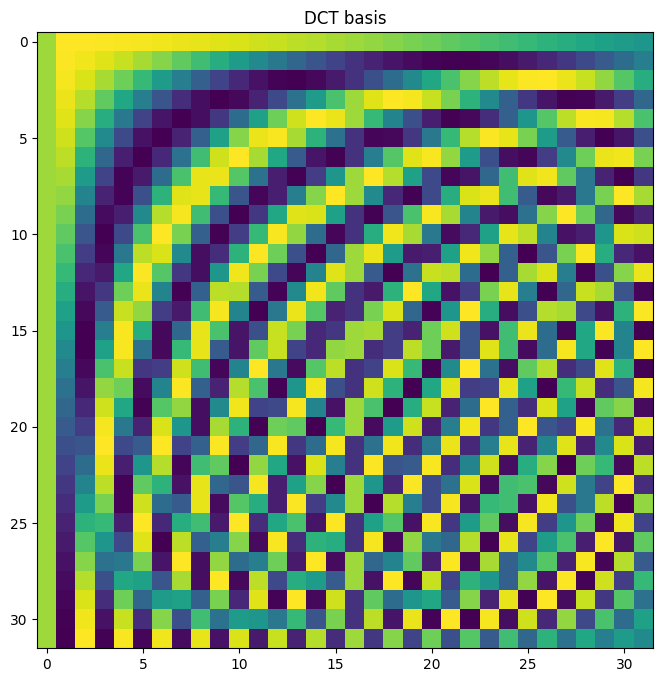

In [90]:
for i in range(M):
    a = np.zeros(M)
    a[i] = 1
    D[:, i] = sp.fftpack.idct(a, norm='ortho')

plt.figure(figsize=(8,8))
plt.imshow(D)
plt.title('DCT basis')


Generate a signal that is sparse w.r.t. D
-----------------------------------------
Set the signal sparsity (try different values)

In [91]:
L = 3

Randomly define the coefficients of a sparse representation (make sure the nonzero coefficients are sufficiently large)

In [92]:
nnz_index = [random.randint(0,M) for i in range(0,L)]
x0 = np.zeros(M)
for i in nnz_index:
  while x0[i]<0.0001:
    x0[i] = random.uniform(-1.5,1.5)

Synthetize the corresponding signal in the signal domain and add noise


In [93]:
s0 = D@x0 

sigma_noise = 0.01 # noise to be added to the signal
# if you want larger noise: 
# sigma_noise = 20/255
# in this case the reconstruction will be worse

s = s0 + np.random.normal(size=M) * sigma_noise

Plot the sparse signal

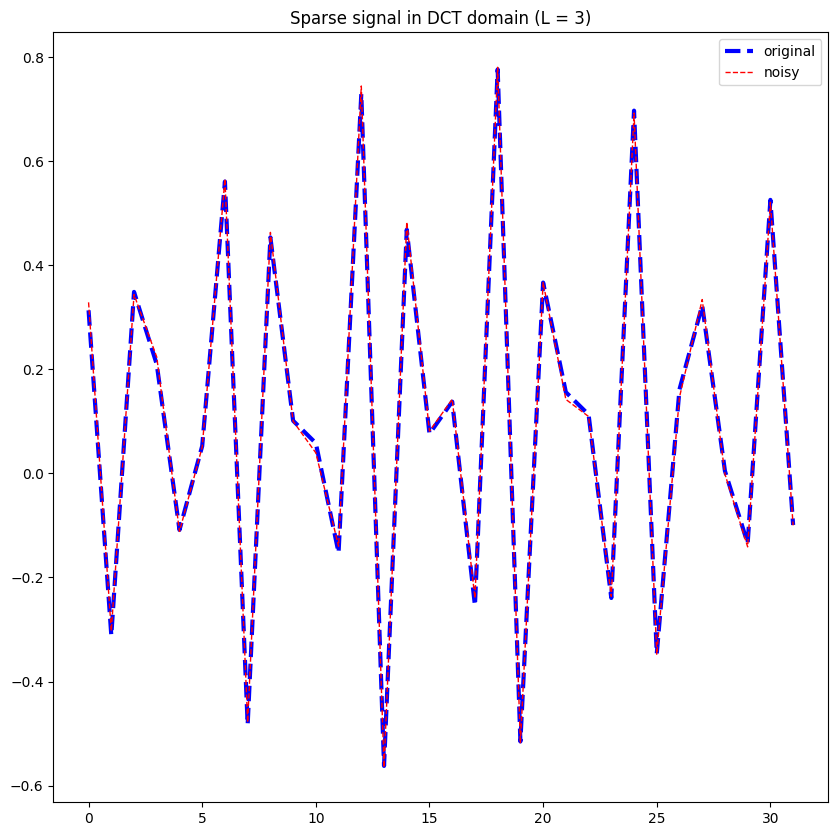

In [94]:
LN_WDT = 2
MRK_SZ = 10

plt.figure(figsize=(10,10))
plt.plot(s0, 'b--', linewidth=LN_WDT+1)
plt.plot(s, 'r--', linewidth=LN_WDT-1)
plt.title(f'Sparse signal in DCT domain (L = {L:.0f})')
plt.legend(['original', 'noisy'])


Implement the sparsity-promoting denoising 
-------------------------------------------
This is expected to be very effective on S!

Analysis: compute the coefficients w.r.t. D

In [95]:
x = D.T@s

Keep only the L largest coefficients (absolute value)

In [96]:
# perform thresholding
indices = np.argpartition(abs(x), -L)[-L:] 
#Find all L biggest in this vector
x_hat= np.zeros(M)
x_hat[indices] = x[indices]

Synthesis: invert the transform

In [97]:
s_hat = D @ x_hat

Plot the results

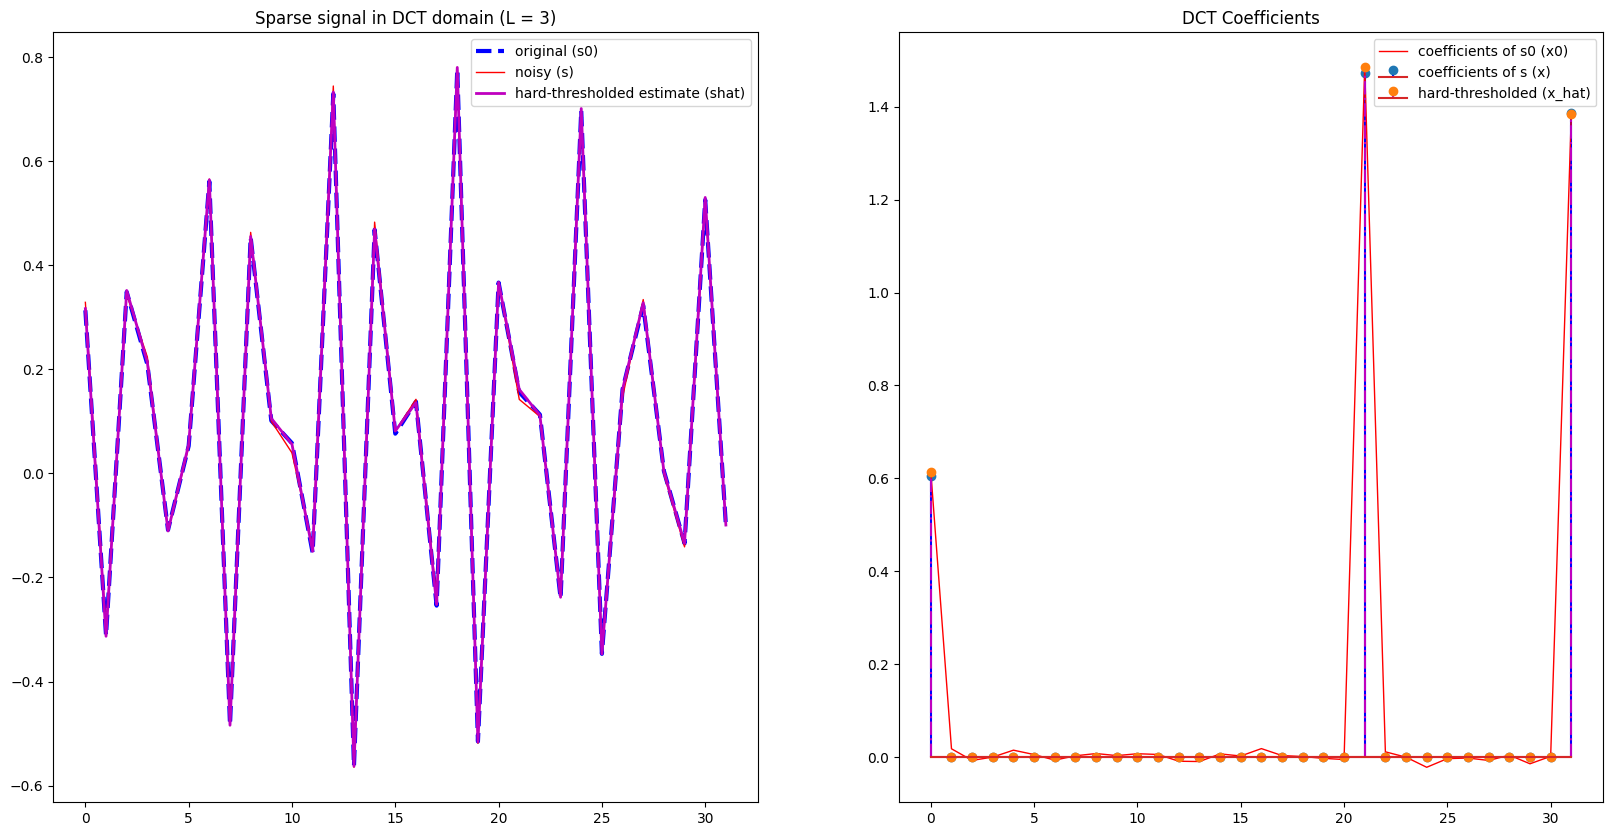

In [98]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(s0, 'b--', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal in DCT domain (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'hard-thresholded estimate (shat)'])


ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].plot(x, 'r-', linewidth=LN_WDT-1)
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s0 (x0)', 'coefficients of s (x)', 'hard-thresholded (x_hat)'])


Sparsity w.r.t redoundant dictionary
------------------------------------
Generate the standard orthonormal basis

Text(0.5, 1.0, 'Canonical basis dimension n = 32')

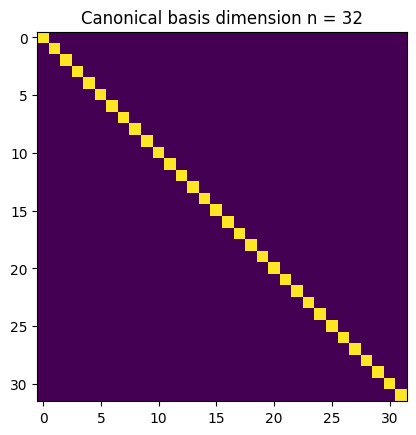

In [99]:
for i in range(M):
    a = np.zeros(M)
    a[i] = 1
    C[:, i] = a

plt.figure(5)
plt.imshow(C)
plt.title(f'Canonical basis dimension n = {M}')


Generate signals that are sparse w.r.t. $[C, D]$ by adding a spike to $s$ that is sparse w.r.t. $D$. Bear in mind that the spike is to be considered a signal to be reconstructed, rather than noise.

Generate a signal that is sparse w.r.t. D

In [100]:
nnz_index = [random.randint(0,M) for i in range(0,L)]
x0 = np.zeros(M)
for i in nnz_index:
  while x0[i]<0.0001:
    x0[i] = random.uniform(-1.5,1.5)
s0 = D@x0


Randomly place a spike in the first 20 samples of s


In [101]:
# choose spike location
spikeLocation = random.randint(0,20)

# modify the signal intensity at spikeLocation
# UPDATE s0
s0[spikeLocation] = 4

Add noise to the signal

In [102]:
sigma_noise = 0.01
s = s0 + np.random.normal(size=M) * sigma_noise

Perform hard thresholding on the coefficients w.r.t. $D$

In [103]:
# analysis: compute the coefficients w.r.t. D
x = D.T@s

# keep only the L largest coefficients (absolute value)
indices = np.argpartition(abs(x), -L)[-L:] 
#Find all L biggest in this vector
x_hat= np.zeros(M)
x_hat[indices] = x[indices]

# invert the transformation
s_hat = D @ x_hat 

Plot the results

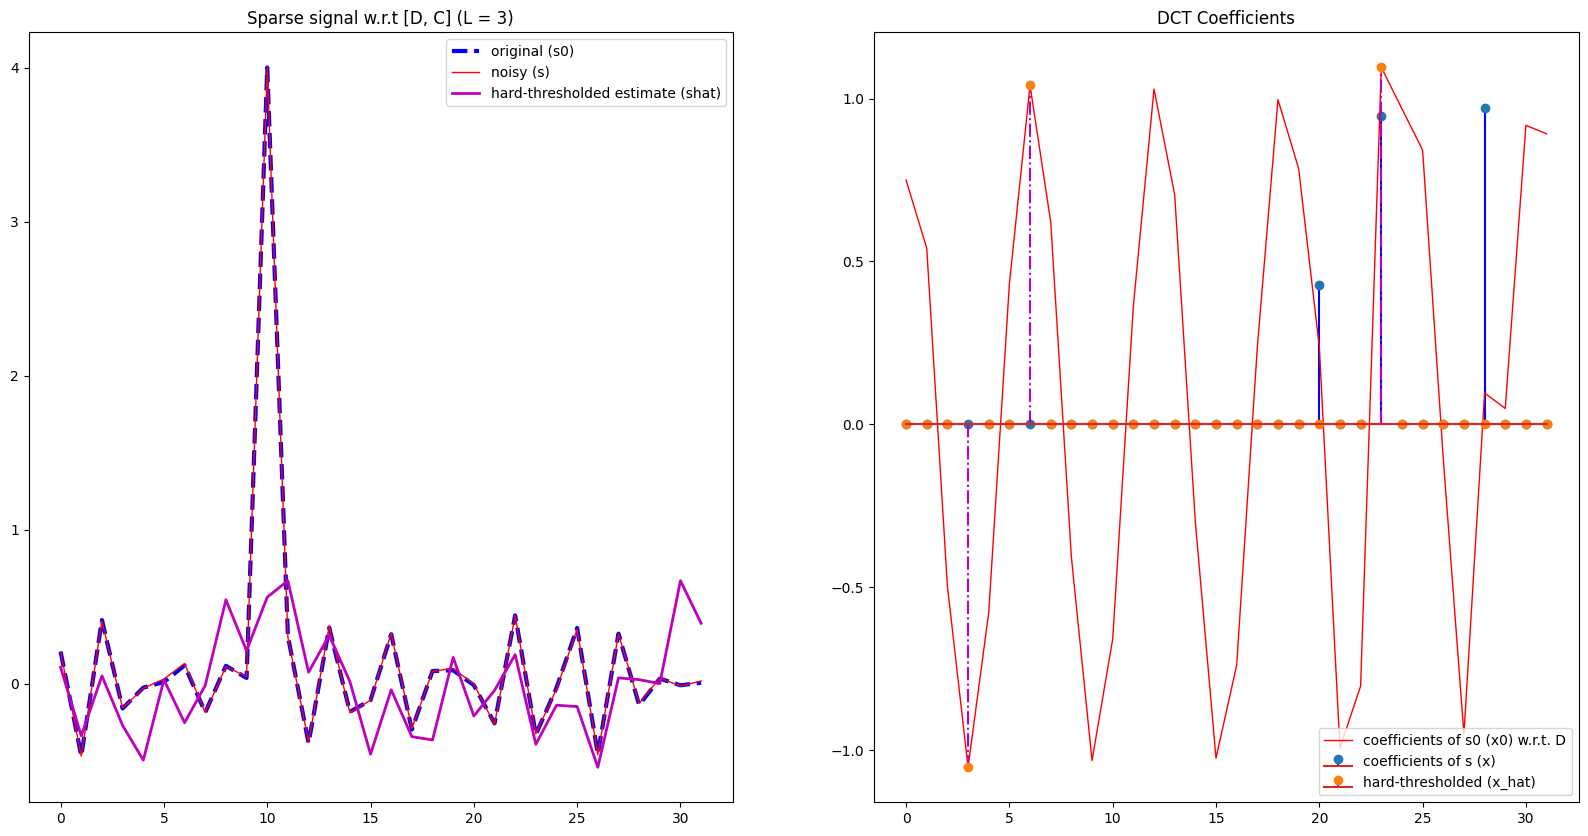

In [104]:
fig, ax = plt.subplots(1, 2, figsize=(20,10))
ax[0].plot(s0, 'b--', linewidth=LN_WDT+1)
ax[0].plot(s, 'r-', linewidth=LN_WDT-1)
ax[0].plot(s_hat, 'm-', linewidth=LN_WDT)
ax[0].set_title(f'Sparse signal w.r.t [D, C] (L = {L:.0f})')
ax[0].legend(['original (s0)', 'noisy (s)', 'hard-thresholded estimate (shat)'])

ax[1].stem(x0, linefmt='b-', markerfmt='C0o')
ax[1].plot(x, 'r-', linewidth=LN_WDT-1)
ax[1].stem(x_hat, linefmt='m-.', markerfmt='C1o')
ax[1].set_title('DCT Coefficients')
ax[1].legend(['coefficients of s0 (x0) w.r.t. D', 'coefficients of s (x)', 'hard-thresholded (x_hat)'])